In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [183]:
train_df = pd.read_csv('C:\\Users\zivic\\OneDrive\Documents\\Jupyter_notebook\\train\\train.csv')
test_df = pd.read_csv('C:\\Users\zivic\\OneDrive\Documents\\Jupyter_notebook\\test\\test.csv') 

In [184]:
train_df['label'] = train_df['label'].where(train_df['label'] == 1, 0)
#test_df['label'] = test_df['label'].where(test_df['label'] == 1, 0)

In [185]:
freq_1 = train_df['label'] == 1
len_1s = freq_1.sum()

#t_freq_1 = test_df['label'] == 1
#t_len_1s = t_freq_1.sum()


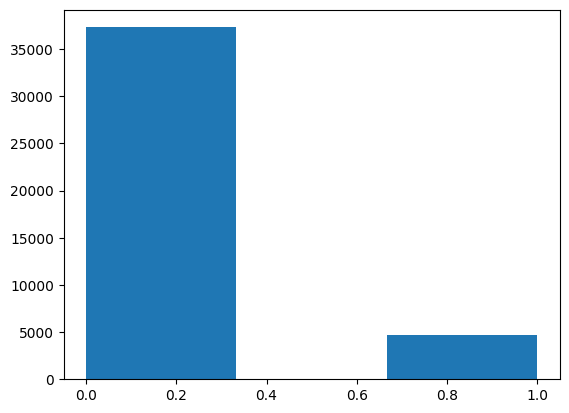

In [186]:
plt.hist(train_df['label'], bins=3)
plt.show()

In [187]:
# sample and equal number of zeros 
zeros = train_df[train_df['label'] == 0].sample(len_1s, random_state=42)

In [188]:
train = pd.concat([train_df[train_df['label'] == 1], zeros])

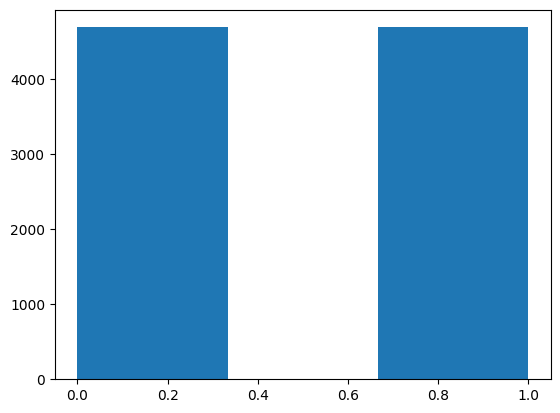

In [189]:
plt.hist(train['label'], bins=3)
plt.show()

In [190]:
y_train, x_train = train['label'], train.drop('label', axis=1)

In [191]:
y_train = y_train.to_frame('label')

In [192]:
X_train, x_val, Y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

In [193]:
print(X_train.shape, Y_train.shape, x_val.shape, y_val.shape)

(7494, 784) (7494, 1) (1874, 784) (1874, 1)


In [206]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def initialize_weights_and_bias(num_features):
    w = np.random.randn(num_features, 1) * 0.01
    b = 0
    return w, b

def forward_propagation(w, b, X, Y):
    # number of examples
    m = X.shape[0]
    Z = np.dot(X, w) + b
    Y_hat = sigmoid(Z)
    epsilon = 1e-15
    loss = -Y * np.log(Y_hat + epsilon) - (1 - Y) * np.log(1 - Y_hat + epsilon)
    cost = np.sum(loss) / m
    return cost, Y_hat

def back_propagation(X, Y, Y_hat):
    m = X.shape[0]
    dloss = Y_hat - Y
    dW = np.dot(X.T, dloss) / m
    dB = np.sum(dloss) / m
    return dW, dB

def update_weights(w, b, X, Y, learning_rate, num_iterations):
    cost_list = []
    
    for i in range(num_iterations):
        cost, A = forward_propagation(w, b, X, Y)
        dW, dB = back_propagation(X, Y, A)
        
        w = w - learning_rate * dW
        b = b - learning_rate * dB
        
        if i % 10 == 0:
            cost_list.append(cost)
            print("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"weight": w, "bias": b}
    gradients = {"dweight": dW, "dbias": dB}
    
    return parameters, gradients, cost_list

def predict(w, b, X):
    Z = np.dot(X, w) + b
    Y_hat = sigmoid(Z)
    predictions = np.round(Y_hat)
    return predictions

def logistic_regression(X_train, Y_train, X_val, Y_val, learning_rate, num_iterations):
    dimension = X_train.shape[1]  # number of features, which is 784
    w, b = initialize_weights_and_bias(dimension)
    parameters, gradients, cost_list = update_weights(w, b, X_train, Y_train, learning_rate, num_iterations)
    
    Y_prediction_val = predict(parameters["weight"], parameters["bias"], X_val)
    Y_prediction_train = predict(parameters["weight"], parameters["bias"], X_train)

    train_accuracy = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    val_accuracy = 100 - np.mean(np.abs(Y_prediction_val - Y_val)) * 100

    print("Train accuracy: {:.2f} %".format(train_accuracy))
    print("Validation accuracy: {:.2f} %".format(val_accuracy))
    
    plt.plot(cost_list)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost")
    plt.title("Cost over Iterations")
    plt.show()

    return parameters, gradients, cost_list, Y_prediction_val


In [195]:

X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()

Cost after iteration 0: 3.705587
Cost after iteration 10: 0.305681
Cost after iteration 20: 0.254853
Cost after iteration 30: 0.229545
Cost after iteration 40: 0.211746
Train accuracy: 97.26 %
Validation accuracy: 97.23 %


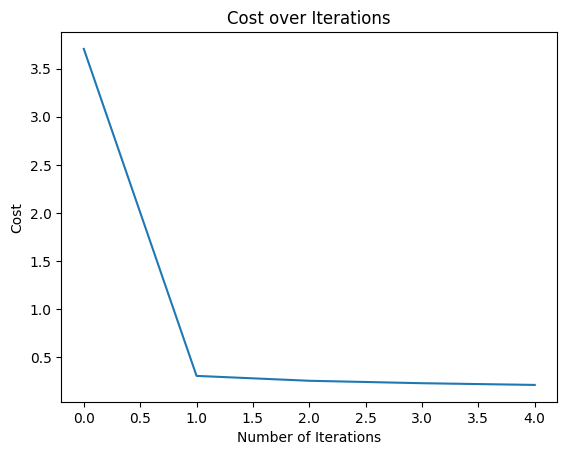

In [207]:

num_features = 784
w, b = initialize_weights_and_bias(num_features)
m_train = 6557


parameters, gradients, cost_list, y_pred_val = logistic_regression(X_train, Y_train, x_val, y_val, learning_rate=0.0001, num_iterations=50)


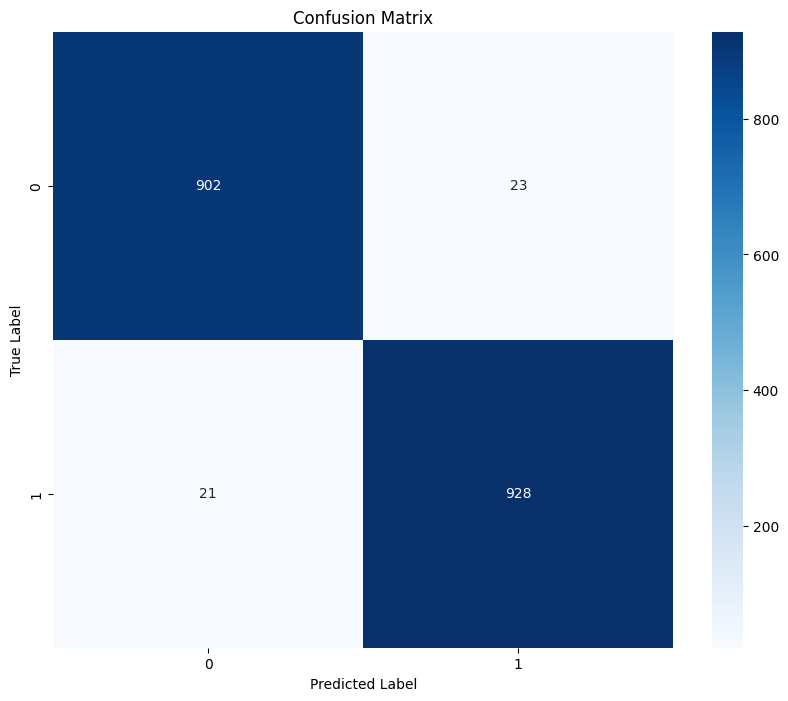

In [202]:

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_val, y_pred_val)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()